In [158]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

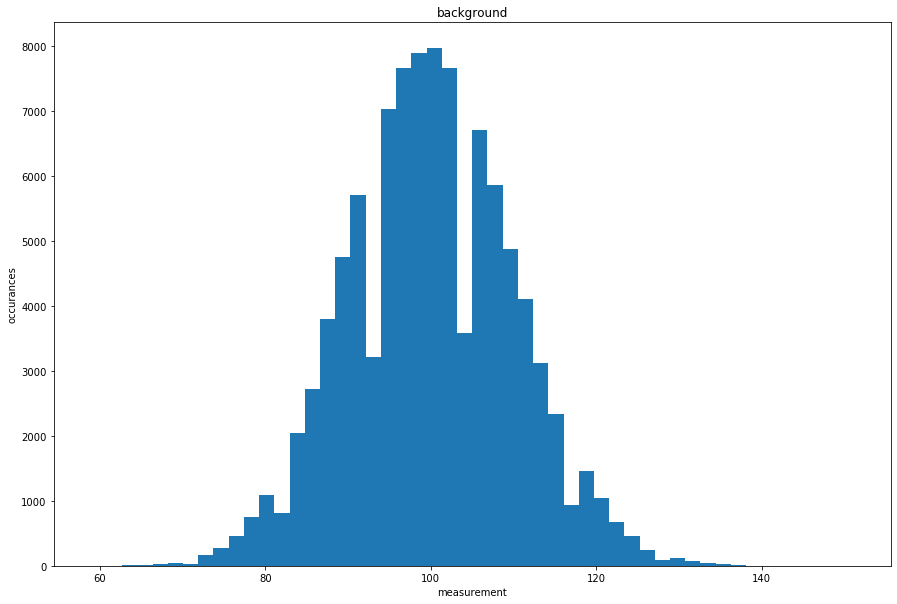

In [159]:
mu=100
bkgd=stats.poisson.rvs(mu=mu,size=100000)
plt.hist(bkgd,bins=50)
plt.xlabel("measurement")
plt.ylabel("occurances")
plt.title("background");

#### Problem 1
##### The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.]

In [160]:
print('5σ sensitivity threshold is at {:.2f}'.format(stats.poisson.ppf(stats.norm.cdf(5),mu=mu)))

5σ sensitivity threshold is at 154.00


#### Problem 2
Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30
σ
 range. Inject this signal into your background data many times.

##### a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.


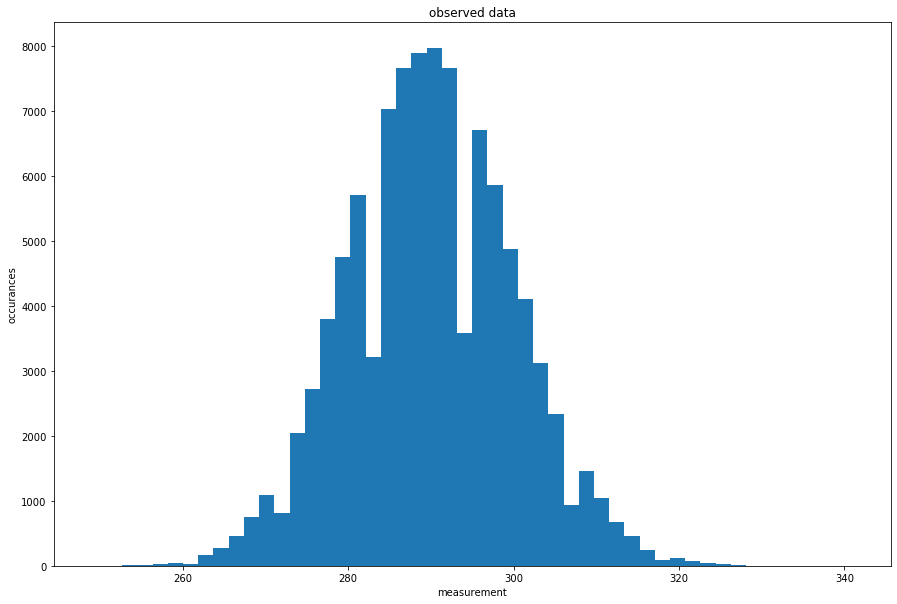

In [161]:
signal1 = stats.poisson.ppf(stats.norm.cdf(8),mu=mu)
data1=list(np.asarray(bkgd) + signal1)

plt.hist(data1,bins=50)
plt.xlabel("measurement")
plt.ylabel("occurances")
plt.title('observed data');

The center of the histogram for observed signal has shifted 20 to the right. It is showing the possible measurement outcomes of the oberserved data, with a true signal strength of 20.

##### b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

The observed signal is biased. The observed data is likely to be stronger than the true injected signal. It is symmetric.

#### Problem 3
Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5
σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

##### a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data



Text(0.5, 1.0, 'Injected signal vs. Observed data')

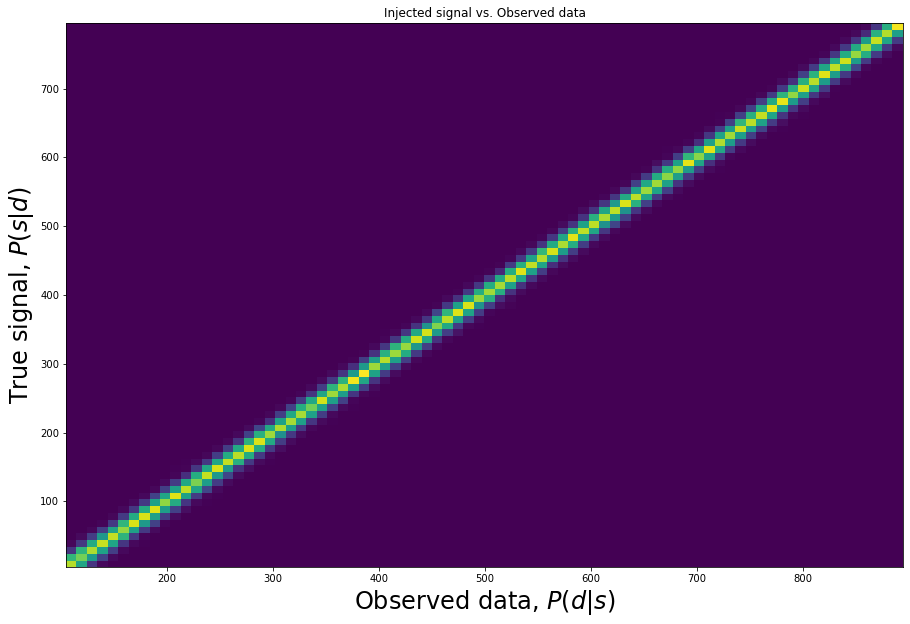

In [162]:
signal2 =np.random.uniform(0,800,100000)
data2= signal2+bkgd


signaledges = np.linspace(0,800,82)
dataedges = np.linspace(100,900,82)
Psd, temp, temp2= np.histogram2d(data2,signal2, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.title('Injected signal vs. Observed data')

##### b) For the same injected signal power as in problem 2, show that you get the same answer.


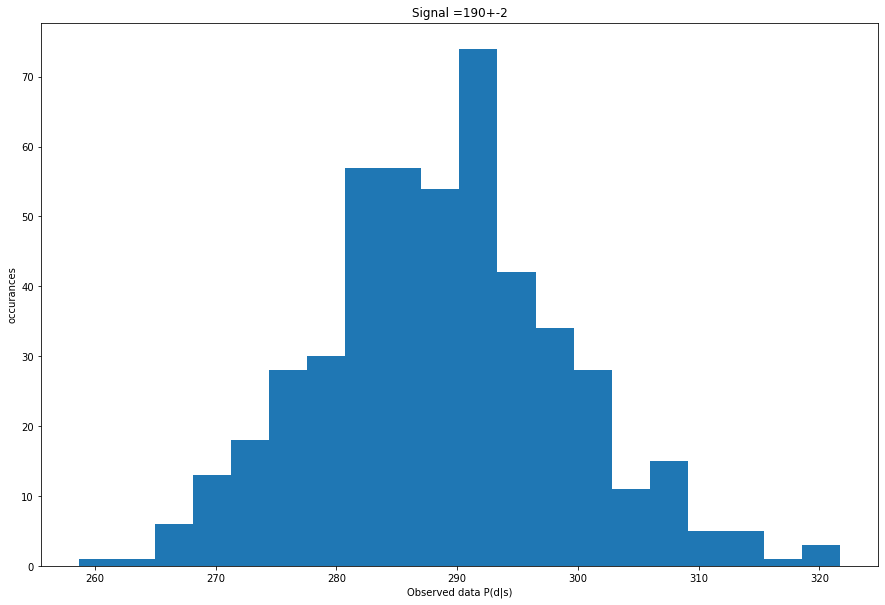

In [163]:
data4=[]
signal4=[]
for i in range (len(signal2)):
    if signal2[i]>=188 and signal2[i]<=192:
        data4.append(data2[i])
        signal4.append(signal2[i])

plt.xlabel("Observed data P(d|s)")
plt.ylabel("occurances")
plt.title("Signal =190+-2")
plt.hist(data4,bins=20);

This is plot is a Poisson distribution with peak at 290, which shows the same answer as problem2.

##### c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.


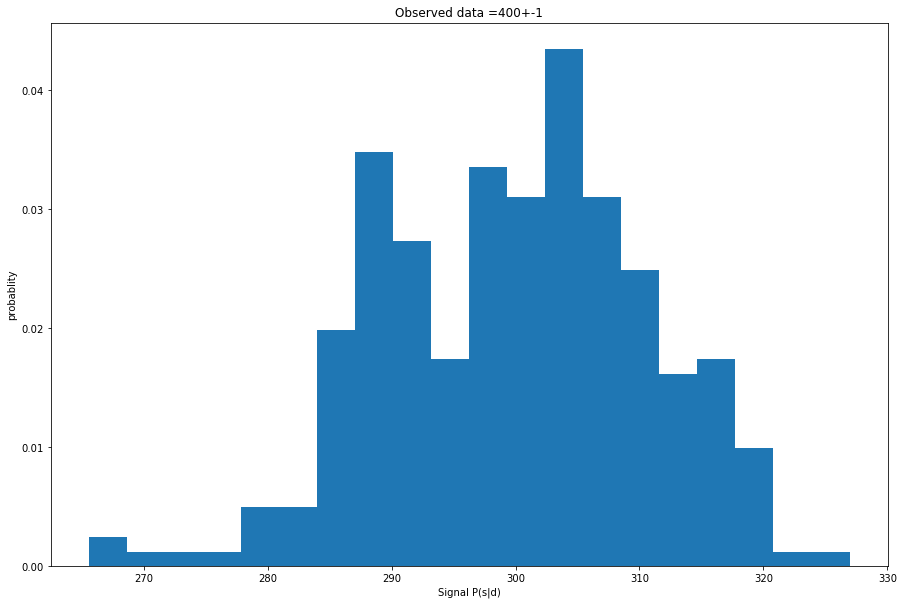

In [164]:
data3=[]
signal3=[]
for i in range (len(data2)):
    if data2[i]>=399 and data2[i]<=401:
        data3.append(data2[i])
        signal3.append(signal2[i])

plt.xlabel("Signal P(s|d)")
plt.ylabel("probablity")
plt.title("Observed data =400+-1")        
plt.hist(signal3,bins=20,density=True);

This is showing that for observed data =400, the true injected signal is most likely to be 300, which is around 100 (average background) less than the observed data. 

##### d) For your observed signal, what is the 1σ uncertainty on the true signal strength?


In [165]:
print('For observed signal=400, the 1σ uncertainty on the true signal strength is {:.2f}'.format(np.std(signal3)))

For observed signal=400, the 1σ uncertainty on the true signal strength is 10.67


##### e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?




It is symmetric. The observed signal is biased by an average of 100. This makes sense: the background is a poisson distribution with mean= 100 (close to Gaussian distribution due to central limit theorem) and the signal is a Gaussian distribution with mean=300, thus the distribution of their sum would also be a Gaussian distribution, and so it is symmetric. The background with average of 100 is consistently added to the measurements, resulting in biased measurements.

In [166]:
!jupyter nbconvert --to html Lab6.ipynb

[NbConvertApp] Converting notebook Lab6.ipynb to html
[NbConvertApp] Writing 384042 bytes to Lab6.html
